### Correlación

En probabilidad y estadística, la correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Se considera que dos variables cuantitativas están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra: si tenemos dos variables (A y B) existe correlación entre ellas si al disminuir los valores de A lo hacen también los de B y viceversa.

Nota: La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad.

In [8]:
import pandas as pd
import numpy as np

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
b_cancer=load_breast_cancer()

In [11]:
cancer_data=b_cancer.data
cancer_names=b_cancer.feature_names

In [13]:
df_cancer=pd.DataFrame(cancer_data,columns=cancer_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
df_cancer_test=df_cancer.iloc[:,:6]

In [24]:
corr_matrix=df_cancer_test.corr()
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000


<AxesSubplot:>

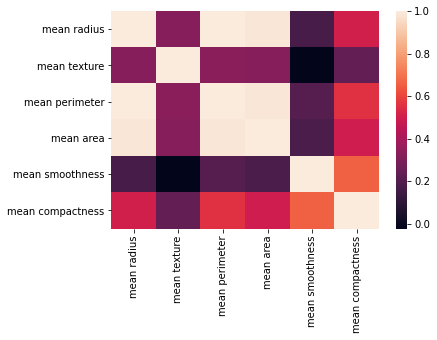

In [23]:
sns.heatmap(corr_matrix)

In [26]:
corr_values=corr_matrix.unstack()

In [27]:
corr_values.sort_values(kind='quicksort')

mean texture      mean smoothness    -0.023389
mean smoothness   mean texture       -0.023389
mean radius       mean smoothness     0.170581
mean smoothness   mean radius         0.170581
mean area         mean smoothness     0.177028
mean smoothness   mean area           0.177028
                  mean perimeter      0.207278
mean perimeter    mean smoothness     0.207278
mean texture      mean compactness    0.236702
mean compactness  mean texture        0.236702
mean area         mean texture        0.321086
mean texture      mean area           0.321086
                  mean radius         0.323782
mean radius       mean texture        0.323782
mean texture      mean perimeter      0.329533
mean perimeter    mean texture        0.329533
mean compactness  mean area           0.498502
mean area         mean compactness    0.498502
mean compactness  mean radius         0.506124
mean radius       mean compactness    0.506124
mean perimeter    mean compactness    0.556936
mean compactn

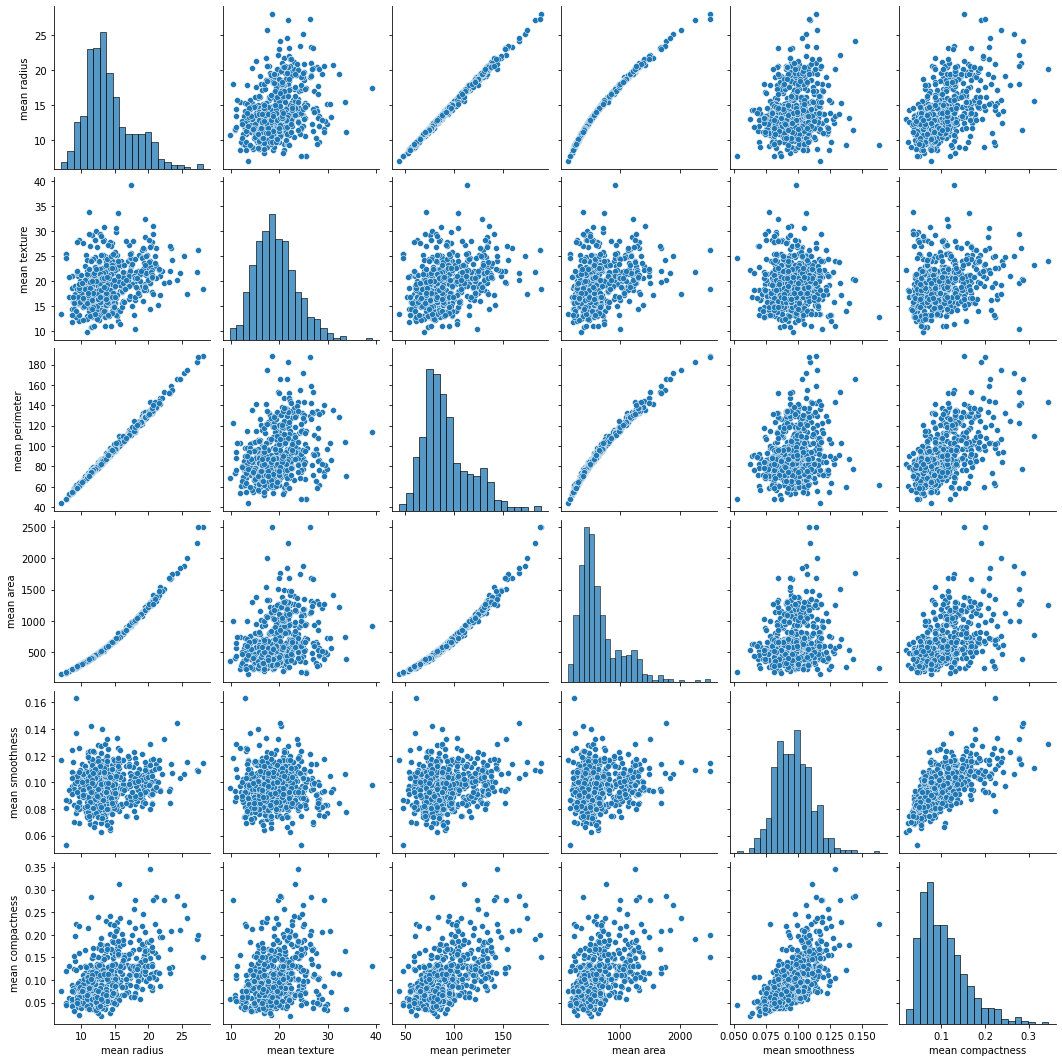

In [28]:
sns.pairplot(df_cancer_test)